# Q2) PRINCIPAL COMPONENT ANALYSIS 

EE769-Assignment(3)  
Name-Rajrishi Sarkar  
Roll-203110061

## loading the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# importing the dataset

In [2]:
data=pd.read_csv(r"C:\Users\ADMIN\Desktop\data for data analysis\assignmnent 3 ee769\DataPCA.csv")
df=pd.DataFrame(data)

# checking our data

In [3]:
df.head()

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,190.0,1.286644,0.508765,-0.074116,0.928244,1.271034,1.637682,2.504835
x2,190.0,-1.135656,0.233921,-1.734167,-1.298233,-1.145689,-0.997318,-0.440730
x3,190.0,5.254907,0.549171,3.967657,4.883782,5.249568,5.625487,6.857529
x4,190.0,3.342504,0.995603,0.649854,2.645102,3.400840,3.996560,5.817673
x5,190.0,4.233765,0.328327,3.306106,4.020569,4.242064,4.463035,5.056247
x6,190.0,-0.412937,0.482069,-1.936695,-0.741547,-0.377963,-0.096413,0.823165
x7,190.0,-0.119058,0.239692,-0.786517,-0.278181,-0.122850,0.036964,0.526882


In [5]:
#checking the data dimensions
df.shape

(190, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


In [7]:
#checking for missing values
df.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

our dataset has no missing values

In [8]:
#checking the unique features
for i in df.columns:
    print(len(df[i].unique()))

190
190
190
190
190
190
190


seems there are no categorical columns

## exploratory data analysis

<AxesSubplot:>

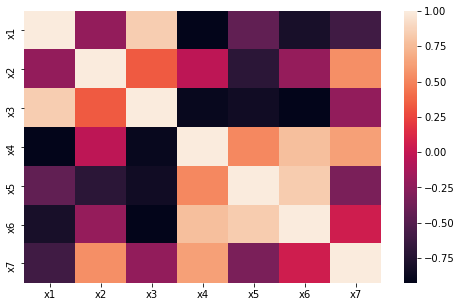

In [9]:
#visualizing the correlation between the features
plt.figure(figsize=(8,5))
sns.heatmap(df.corr())

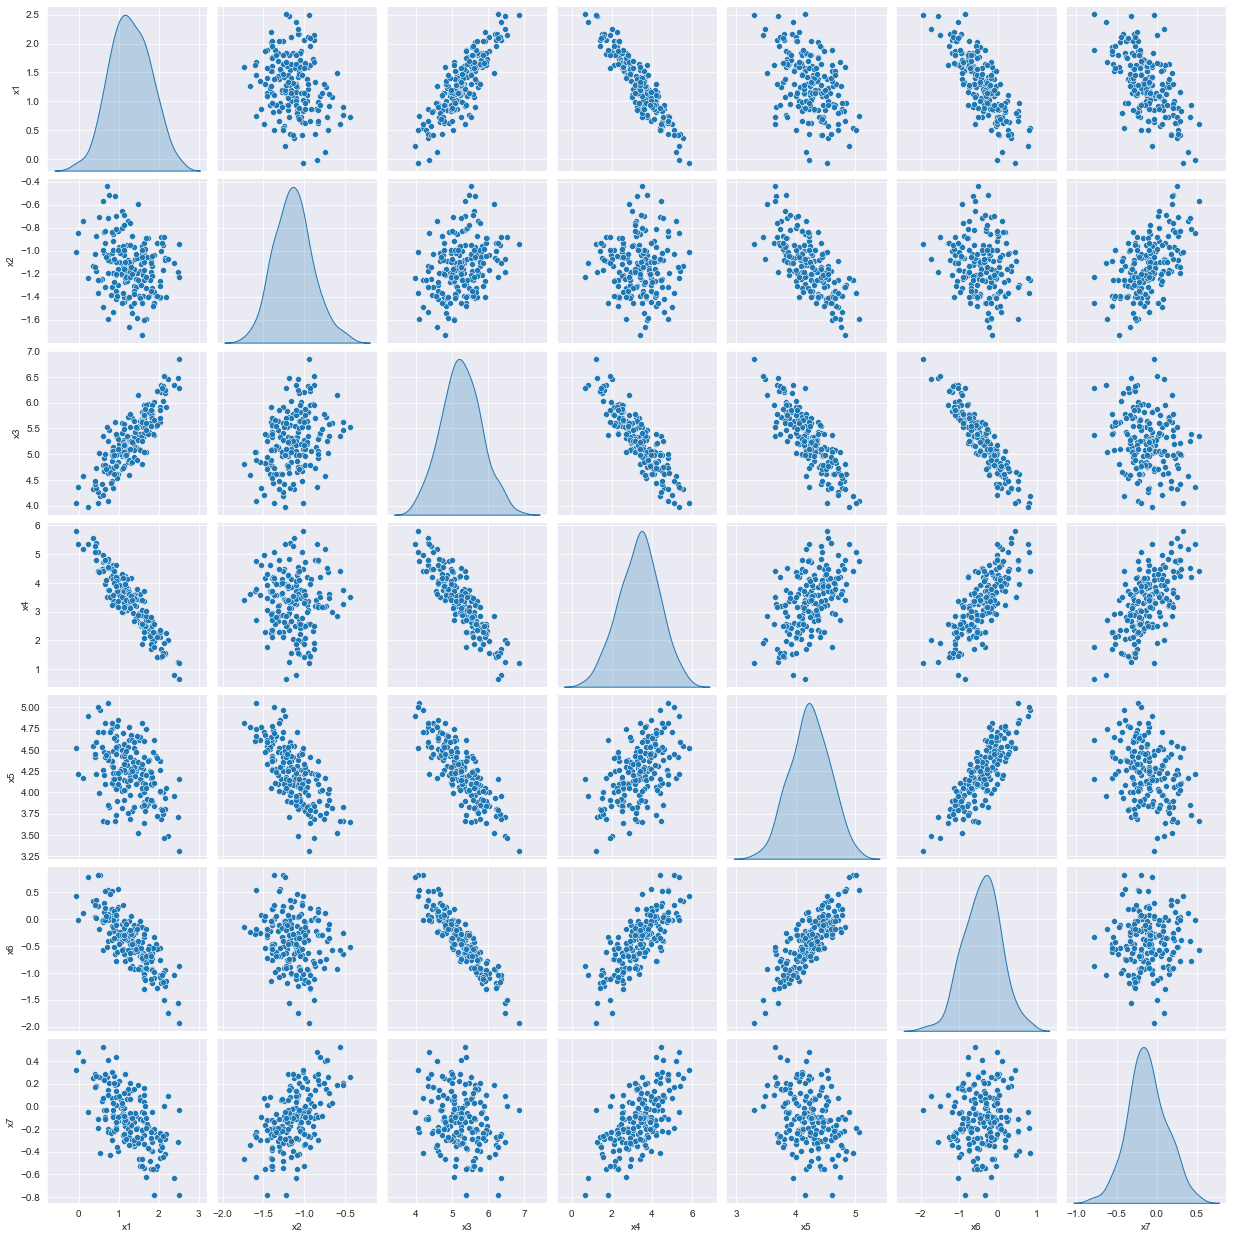

In [31]:
#taking a birds eye view to the entire dataset
sns.pairplot(data=df,diag_kind='kde')

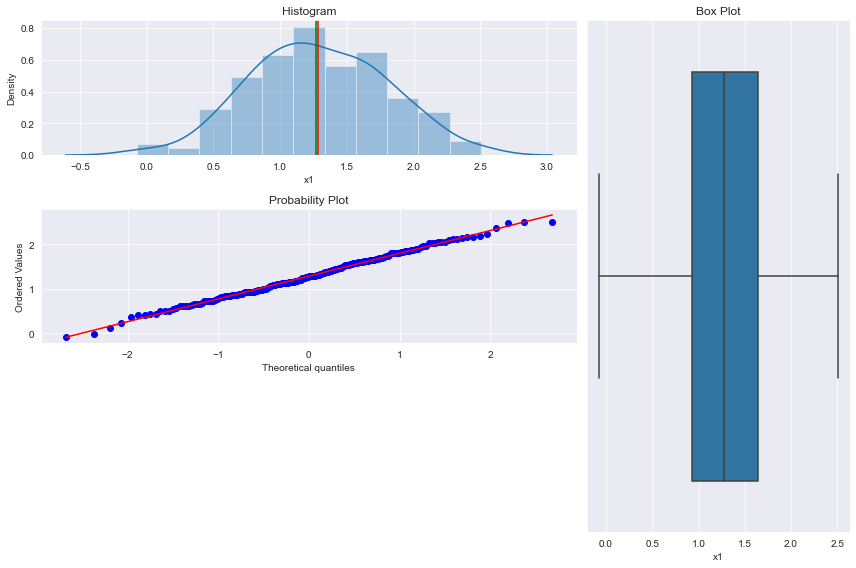

****************************************************************************************************************


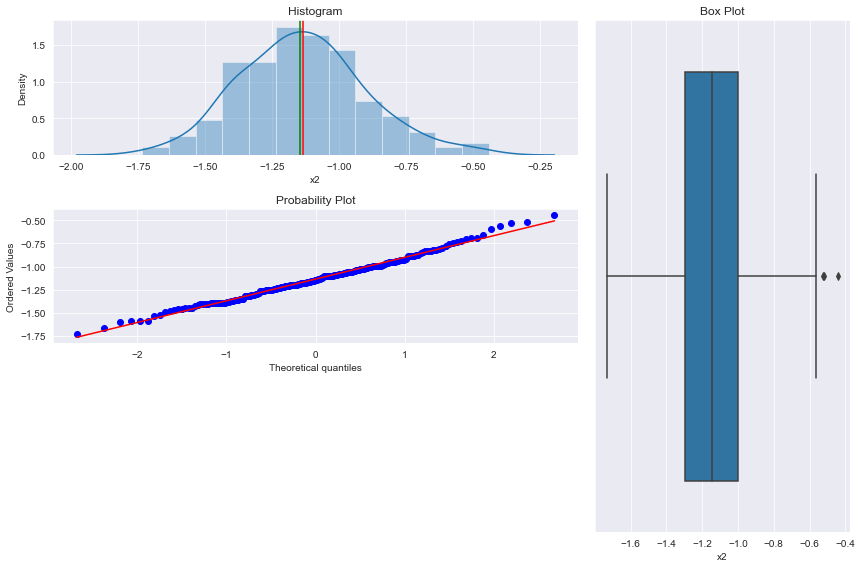

****************************************************************************************************************


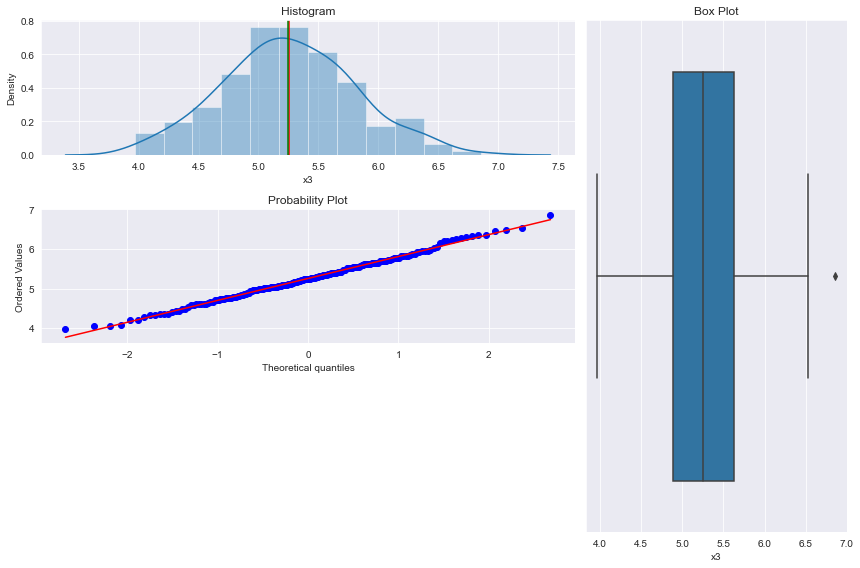

****************************************************************************************************************


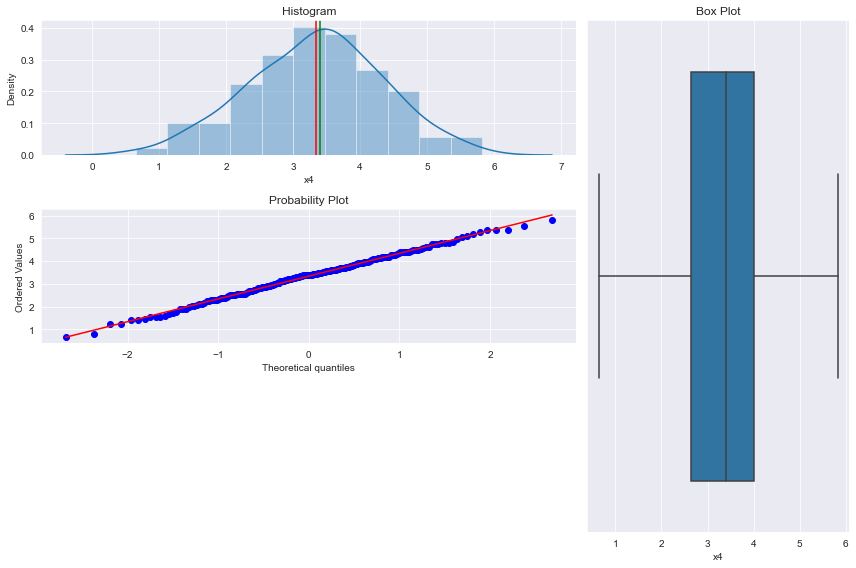

****************************************************************************************************************


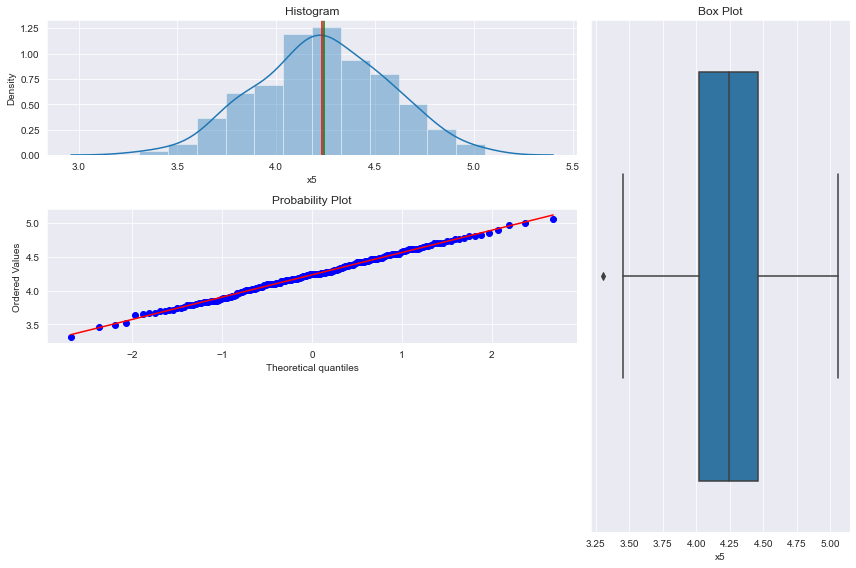

****************************************************************************************************************


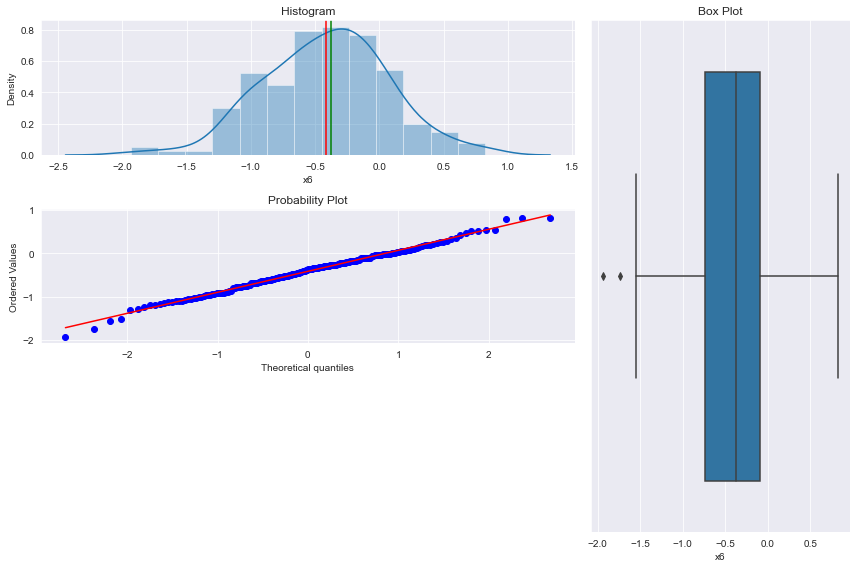

****************************************************************************************************************


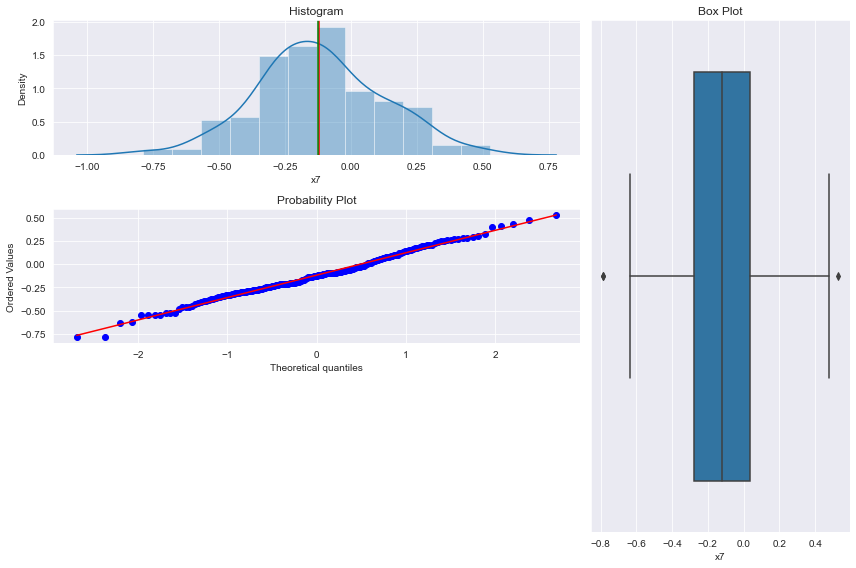

****************************************************************************************************************


In [18]:
from scipy import stats
import matplotlib.gridspec as gridspec
sns.set_style("darkgrid")

def three_chart_plot(df, feature):
    
    #grid creation
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    #adding distribution plot into the grid
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    #adding qq plot to the grid
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    #adding boxlot to the grid 
    ax3 = fig.add_subplot(grid[:, 2]) 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], ax = ax3 ,orient = 'h')
    
    
    plt.tight_layout()  
    
#visualizing the variables    
for i in df.columns:
    three_chart_plot(df,i)
    plt.show()
    print("****************************************************************************************************************")

it's good to see that all the features in the dataset are normally distributed  

## Data standardization

In [12]:
#scaling the data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
df_scaled=std.fit_transform(df)

# Principal component analysis

Principal Component Analysis(PCA) is an unsupervised statistical technique used to examine the interrelation among a set of variables in order to identify the underlying structure of those variables. In simple words, suppose you have 30 features column in a data frame so it will help to reduce the number of features making a new feature which is the combined effect of all the feature of the data frame. It is also known as factor analysis

**Fitting into PCA**

In [13]:
#fitting the scaled data into PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(df)

array([[-1.13995472e+00,  2.04631578e-01, -2.64825773e-02, ...,
        -9.84064808e-04, -5.96270789e-03, -3.13055070e-04],
       [ 2.53509569e-02, -1.05805409e-01,  7.09647584e-03, ...,
         2.87721448e-03,  7.33928860e-03,  5.07943859e-03],
       [ 3.51523782e-01,  4.56330825e-01, -3.99527426e-01, ...,
         1.29194511e-02,  4.24251226e-05,  2.50094253e-03],
       ...,
       [ 8.33829153e-01,  1.52803593e-01, -2.79757693e-01, ...,
         6.22433324e-03,  5.82894061e-03, -7.01077348e-05],
       [ 5.74174104e-01, -8.98579589e-02, -3.04411063e-01, ...,
         1.73440024e-02, -3.02378200e-03, -1.93933700e-04],
       [ 7.94846112e-01, -1.94486108e-01, -2.87128430e-01, ...,
        -2.25856374e-02, -1.55701481e-03,  2.59532898e-03]])

**Visualizing the explained variance**

In [14]:
#find the explained variance
explained_variance=pca.explained_variance_ratio_
explained_variance

array([8.44570609e-01, 1.16144014e-01, 3.24987995e-02, 6.68021701e-03,
       8.89007797e-05, 1.57508750e-05, 1.70909199e-06])

Text(0.5, 1.0, 'cumulative variance')

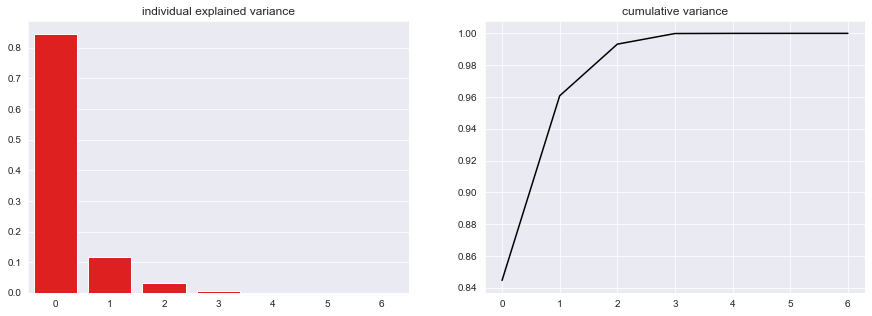

<Figure size 720x360 with 0 Axes>

In [19]:
#creating the subplots
fig,axes=plt.subplots(1,2,figsize=(15, 5))


#plotting the explained variance with the number of components
plt.figure(figsize=(10,5))
x=np.arange(pca.explained_variance_ratio_.size)#takes total elements in the array and arranges them
y=pca.explained_variance_ratio_
sns.barplot(x=x,y=y,color="red",ax=axes[0]).set_title("individual explained variance")



#plotting the cumulative explained variance
x1=np.arange(pca.explained_variance_ratio_.size)
y1=np.cumsum(pca.explained_variance_ratio_)#takes the array and finds the cumulative sum with the ongoing components
sns.lineplot(x1,y1,color="black",ax=axes[1]).set_title("cumulative variance")



**Data reconstruction and calculation of MSE**

lets consider n-componenets=2 as more than 95 percent variance is retained already

Text(0, 0.5, 'PRICIPAL COMPONENT 2')

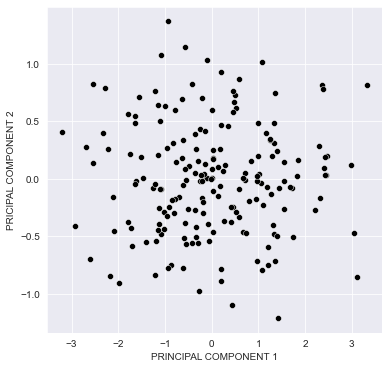

In [26]:
#transforming the data
pca=PCA(n_components=2)
df_transformed=pca.fit_transform(df)

#visualizing through a scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=df_transformed[:,0],y=df_transformed[:,1],color="black")
plt.xlabel("PRINCIPAL COMPONENT 1")
plt.ylabel("PRICIPAL COMPONENT 2")


###############################################################################################################################